<a href="https://colab.research.google.com/github/kaispace30098/Sales-Prediction---Holt-Winters-Model/blob/main/Holt_Winters_Model_on_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries and Sales data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
!pip install -U statsmodels
from google.colab import files
uploaded = files.upload()
import io
def read_dir_file(case_f):  # case_f = 0 for uploading one File and case_f = 1 for uploading one Zipped Directory
        #uploaded = files.upload()    # to upload a Full Directory, please Zip it first (use WinZip)
        for fn in uploaded.keys():
            name = fn  #.encode('utf-8')
            #print('\nfile after encode', name)
            #name = io.BytesIO(uploaded[name])
        if case_f == 0:    # case of uploading 'One File only'
            print('\n file name: ', name)
            return name
        else:   # case of uploading a directory and its subdirectories and files
            zfile = zipfile.ZipFile(name, 'r')   # unzip the directory 
            zfile.extractall()
            for d in zfile.namelist():   # d = directory
                print('\n main directory name: ', d)
                return d
fileName = read_dir_file(0)
df = pd.read_csv(io.BytesIO(uploaded[fileName ]),header=None)[1:]# Dataset is now stored in a Pandas Dataframe


In [23]:
#Configuration on header name and data type
df = df.rename(columns={0: 'date', 1: 'Sales'})
df.Sales.apply(pd.to_numeric)
df["Sales"] = pd.to_numeric(df["Sales"], downcast="float")

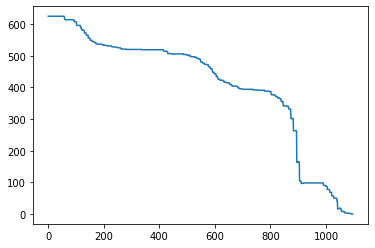

In [24]:
#View the data
df.Sales.plot()

In [25]:
#Set up days of samples for test set
DayforTest = 30
train = df.iloc[:-DayforTest]
test = df.iloc[-DayforTest:]
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [26]:
#Import Holt-Winters Model 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [27]:
#Hyperparameter Tuning zone
alpha = 0.18
beta = 0.185
gamma = 0.019




In [28]:
#Define the model
hw = ExponentialSmoothing(
    train['Sales'],
    #initialization_method='legacy-heuristic',
    initialization_method='estimated',
    trend='add', seasonal='add', seasonal_periods=365)

In [29]:
#Train the model
history = hw.fit(smoothing_level=alpha, smoothing_slope=beta,
smoothing_seasonal=gamma)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [31]:
#In-Sample prediction
df.loc[train_idx, 'HoltWintersTrain'] = history.fittedvalues

In [30]:
#Out-of-Sample Forcasting
df.loc[test_idx, 'HoltWintersTest'] = history.forecast(DayforTest)

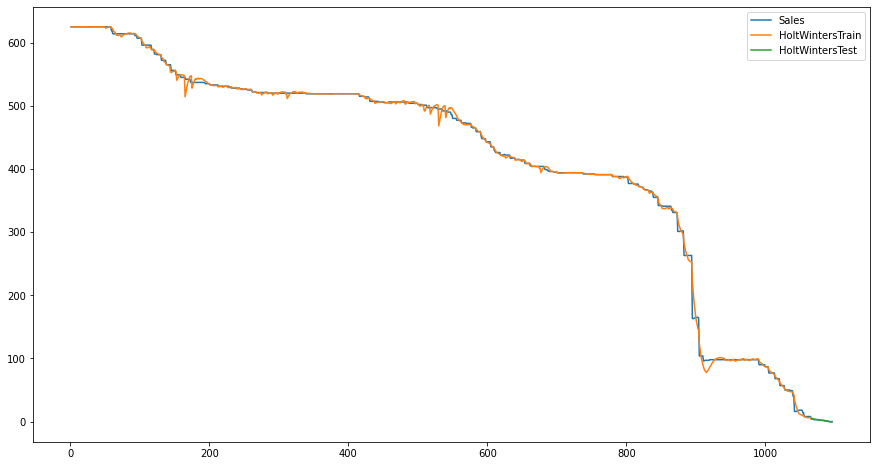

In [33]:
#Plot the output
#We expect to see the close green line aligned to the blue line.
df[['Sales', 'HoltWintersTrain', 'HoltWintersTest']].plot(figsize=(15, 8));

In [35]:
#Measure of fit on inner samples
r2_score(train['Sales'], history.fittedvalues)


0.9992171842004267

In [36]:
#Measure of fit on validation 
r2_score(test['Sales'], history.forecast(DayforTest))

0.8296443570514056

In [37]:

#Combine Train and Validation data set and apply the model
hw = ExponentialSmoothing(
    df['Sales'],
    initialization_method='legacy-heuristic',
    trend='add', seasonal='add', seasonal_periods=365)
res_hw = hw.fit(smoothing_level=alpha, smoothing_slope=beta,
smoothing_seasonal=gamma)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


30 days cumulated sales: 6.356898187926106


0.9993303136979935

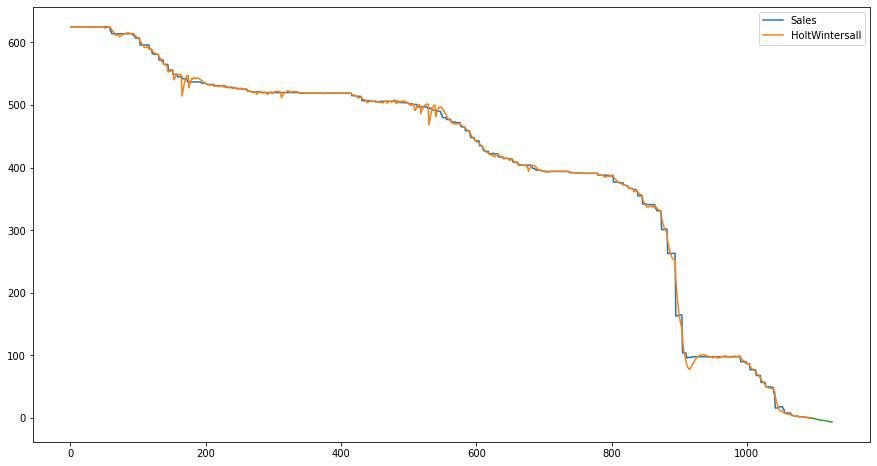

In [38]:
#Forcasting Result
df['HoltWintersall'] = res_hw.fittedvalues
df[['Sales', 'HoltWintersall']].plot(figsize=(15, 8));
plt.plot(res_hw.forecast(steps=30))
list1=np.array(res_hw.forecast(steps=30))
print('30 days cumulated sales:',-list1[29])
#all Sample R-sqaured
r2_score(df['Sales'], res_hw.fittedvalues)



30 days cumulated sales: 372.0954966906812
